In [49]:
import pandas as pd
import numpy as np
import spacy
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_excel('SHL_assesment_list.xlsx')

In [51]:
data

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry,AKP,The Administrative Professional solution is fo...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry,BP,The Apprentice + 8.0 Job-Focused Assessment is...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry,BP,The Apprentice 8.0 Job-Focused Assessment is a...
...,...,...,...,...,...,...,...,...
118,Service Associate Solution,https://www.shl.com/solutions/products/product...,yes,yes,38,Entry,ABP,The Service Associate is designed for entry-le...
119,Service Supervisor Solution,https://www.shl.com/solutions/products/product...,yes,yes,48,"Front Line Manager, Manager, Supervisor",ABP,The Service Supervisor solution is designed fo...
120,Stock Clerk Solution,https://www.shl.com/solutions/products/product...,yes,no,25,Entry,ABP,The Stock Clerk solution is for entry-level re...
121,Store Manager 7.0 Solution,https://www.shl.com/solutions/products/product...,yes,no,34,Manager,BC,Our Store Manager 7.0 solution is designed for...


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Assesment Name          123 non-null    object
 1   URL                     123 non-null    object
 2   Remote Testing Support  123 non-null    object
 3   Adaptive/IRT            123 non-null    object
 4   Duration                123 non-null    int64 
 5   Job Type                123 non-null    object
 6   Test Type               123 non-null    object
 7   Description             123 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.8+ KB


In [53]:
data.describe()

,Duration
count,123.000000
mean,39.463415
std,13.860128
min,16.000000
25%,29.000000
50%,41.000000
75%,49.000000
max,74.000000


In [54]:
data.nunique()

Assesment Name            120
URL                       120
Remote Testing Support      2
Adaptive/IRT                2
Duration                   43
Job Type                   12
Test Type                  32
Description               114
dtype: int64

In [55]:
data.isnull().sum()

Assesment Name            0
URL                       0
Remote Testing Support    0
Adaptive/IRT              0
Duration                  0
Job Type                  0
Test Type                 0
Description               0
dtype: int64

In [56]:
data.duplicated().sum()

1

In [57]:
data=data.drop_duplicates()

In [58]:
data

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry,AKP,The Administrative Professional solution is fo...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry,BP,The Apprentice + 8.0 Job-Focused Assessment is...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry,BP,The Apprentice 8.0 Job-Focused Assessment is a...
...,...,...,...,...,...,...,...,...
118,Service Associate Solution,https://www.shl.com/solutions/products/product...,yes,yes,38,Entry,ABP,The Service Associate is designed for entry-le...
119,Service Supervisor Solution,https://www.shl.com/solutions/products/product...,yes,yes,48,"Front Line Manager, Manager, Supervisor",ABP,The Service Supervisor solution is designed fo...
120,Stock Clerk Solution,https://www.shl.com/solutions/products/product...,yes,no,25,Entry,ABP,The Stock Clerk solution is for entry-level re...
121,Store Manager 7.0 Solution,https://www.shl.com/solutions/products/product...,yes,no,34,Manager,BC,Our Store Manager 7.0 solution is designed for...


In [59]:
data['Test Type'].value_counts()

Test Type
ABP      37
ABPS     15
B        10
BCP       8
BC        7
AB        5
ABKPS     3
CP        3
BKP       3
BP        3
SBCP      2
ABC       2
CB        2
PSKBA     2
ABKP      2
SABP      2
PAB       1
BK        1
S         1
PB        1
CPAB      1
PBC       1
SABKP     1
CPB       1
AKP       1
BPA       1
PBCAS     1
ABCPS     1
PSAB      1
BAP       1
BPSA      1
APSB      1
Name: count, dtype: int64

In [60]:
data['Job Type'].value_counts()

Job Type
Entry                                                                   62
Manager                                                                 22
Mid-Professional, Professional Individual Contributor                   14
Executive, Director, Front Line Manager, Manager                         8
Middle                                                                   5
Graduate                                                                 3
Mid-Professional,Professional Individual Contributor                     2
Front Line Manager, Manager, Supervisor                                  2
Front Line Manager, Professional Individual Contributor, Supervisor,     1
Director                                                                 1
Executive                                                                1
 Mid-Professional, Professional Individual Contributor                   1
Name: count, dtype: int64

In [61]:
data['Adaptive/IRT'].value_counts()

Adaptive/IRT
yes    65
no     57
Name: count, dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


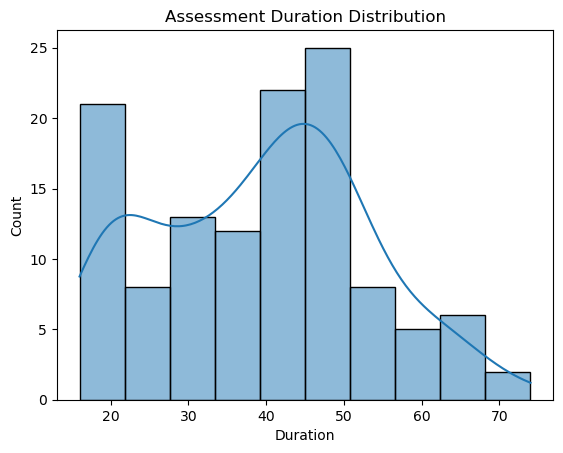

In [62]:
sns.histplot(data['Duration'], bins=10, kde=True)
plt.title("Assessment Duration Distribution")
plt.show()

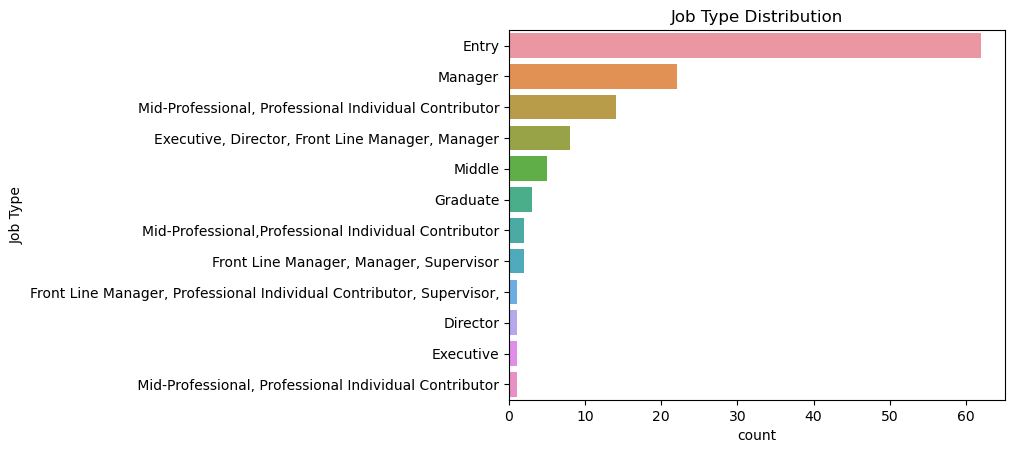

In [63]:
sns.countplot(data=data, y='Job Type', order=data['Job Type'].value_counts().index)
plt.title("Job Type Distribution")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\3345877905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desc_len'] = data['Description'].apply(lambda x: len(x.split()))
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


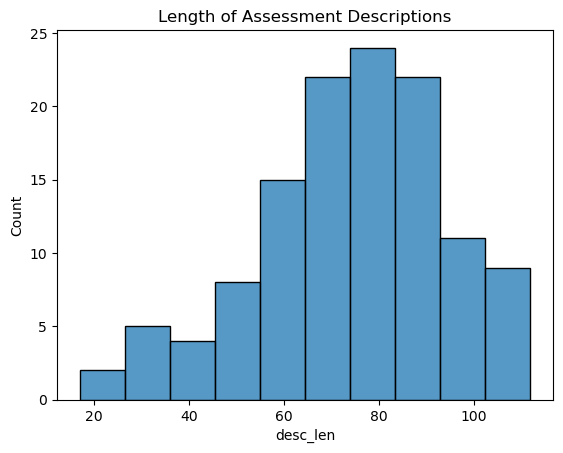

In [64]:
data['desc_len'] = data['Description'].apply(lambda x: len(x.split()))

sns.histplot(data['desc_len'], bins=10)
plt.title("Length of Assessment Descriptions")
plt.show()

## Combining Description and Job Type for Model building and Visualization

In [65]:
data['Comb_text'] = data['Job Type'].fillna('') + ' ' + data['Description']

C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\2945813371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Comb_text'] = data['Job Type'].fillna('') + ' ' + data['Description']


# Word Cloud

In [66]:
import spacy
nlp=spacy.load('en_core_web_sm')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import SnowballStemmer

In [67]:
lem=WordNetLemmatizer()
def clean_words(text):
    # Define a regex pattern for URLs
    url_pattern = re.compile(r'http[s]?://\S+')
    
    # Remove URLs from the text
    text = re.sub(url_pattern, '', text)
    doc= nlp(text)
    clean_text=[x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num and not x.is_bracket and not x.pos_ in['SYM']]
    return ' '.join(clean_text)

In [68]:
# Apply the cleaning function to the 'Comb_text' column
data['cleaned_text'] = data['Comb_text'].apply(clean_words)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\3153535193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['Comb_text'].apply(clean_words)


In [69]:
data.head()

,Assesment Name,URL,Remote Testing Support,Adaptive/IRT,Duration,Job Type,Test Type,Description,desc_len,Comb_text,cleaned_text
0,Account Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,49,Middle,CPAB,The Account Manager solution is an assessment ...,87,Middle The Account Manager solution is an asse...,Middle Account Manager solution assessment job...
1,Administrative Professional-Short Form,https://www.shl.com/solutions/products/product...,yes,yes,36,Entry,AKP,The Administrative Professional solution is fo...,67,Entry The Administrative Professional solution...,entry Administrative Professional solution ent...
2,Agency Manager Solution,https://www.shl.com/solutions/products/product...,yes,yes,51,Manager,ABPS,The Agency Manager solution is for mid-level s...,77,Manager The Agency Manager solution is for mid...,Manager Agency Manager solution mid level sale...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,30,Entry,BP,The Apprentice + 8.0 Job-Focused Assessment is...,51,Entry The Apprentice + 8.0 Job-Focused Assessm...,entry Apprentice + Job Focused Assessment shor...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/solutions/products/product...,yes,no,20,Entry,BP,The Apprentice 8.0 Job-Focused Assessment is a...,43,Entry The Apprentice 8.0 Job-Focused Assessmen...,entry Apprentice Job Focused Assessment short ...


In [70]:
df= [x.strip() for x in data.cleaned_text] # remove the space in paragraph
txt=''.join(df)

In [71]:
txt

'Middle Account Manager solution assessment job candidate apply mid level leadership position tend manage day day operation activity client account sample task job include limit communicate client project status develop maintain project plan coordinate internally appropriate project personnel ensure client expectation meet potential job title use solution Account Executive Account Manager Senior Account Manager multiple configuration solution availableentry Administrative Professional solution entry mid level position involve routine clerical administrative function addition office management function customer service sample task job include limit arrange conference call draft correspondence scheduling meeting greet visitor coordinate office activity potential job title use solution Administrative Assistant Secretary Office Manager Administrative Aide Administrative AssociateManager Agency Manager solution mid level sale management position include line management sale responsibility s

In [72]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [73]:
def wordcloud(data):
  plt.figure(figsize=(10,10))
  plt.imshow(data,interpolation='bilinear')
  plt.axis('off')
  plt.show() 

In [74]:
df_cloud= WordCloud(width=800,height=1000,background_color='black',colormap='plasma').generate(txt)

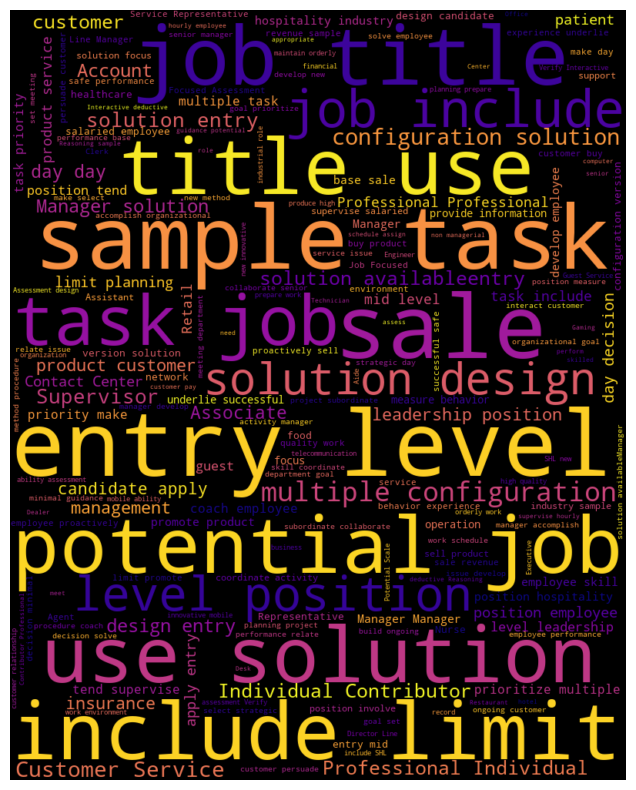

In [75]:
wordcloud(df_cloud)

## Sentiment Analysis

In [76]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [77]:
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\3753534125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['cleaned_text'].apply(get_sentiment)


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


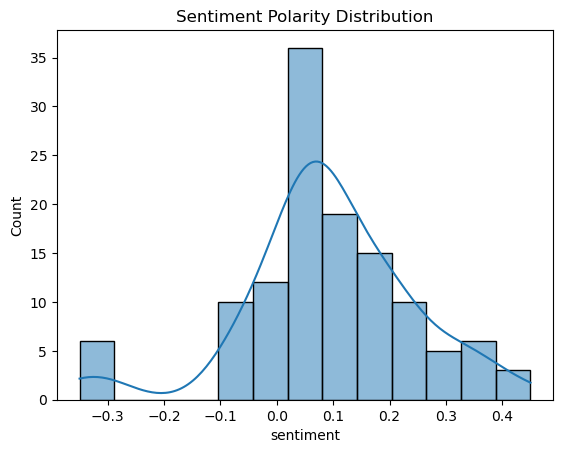

In [78]:
sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

## N-grams Analysis

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(data)
    ngrams_freq = ngrams.sum(axis=0).A1
    ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['frequency'])
    ngrams_df = ngrams_df.sort_values(by='frequency', ascending=False).head(20)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=ngrams_df.frequency, y=ngrams_df.index, palette='viridis')
    plt.title(f'Top {n}-grams')
    plt.show()

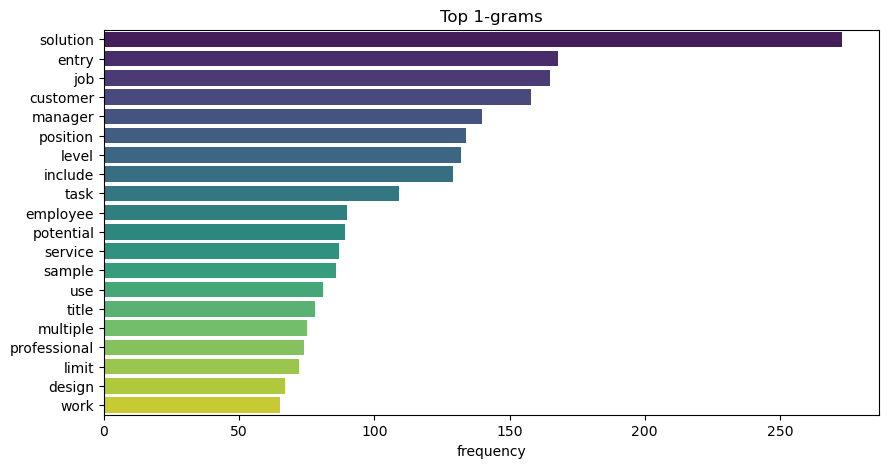

In [80]:
## Unigrams
plot_ngrams(data['cleaned_text'], n=1)

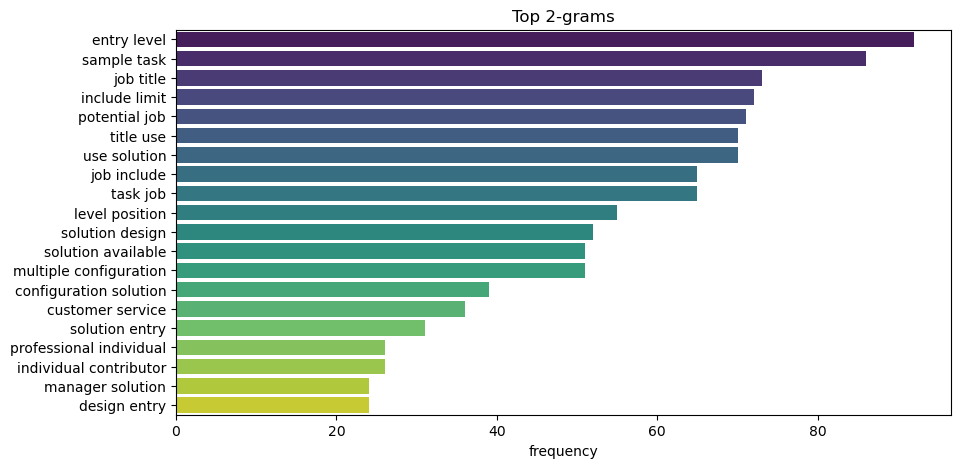

In [81]:
# Bigrams
plot_ngrams(data['cleaned_text'], n=2)

# Model Building

## Install Required Packages

In [172]:
!pip install sentence-transformers faiss-cpu umap-learn matplotlib

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/45/2d/1151b371f28caae565ad384fdc38198f1165571870217aedda230b9d7497/sentence_transformers-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for faiss-cpu from https://files.pythonhosted.org/packages/2c/2d/d2a4171a9cca9a7c04cd9d6f9441a37f1e0558724b90bf7fc7db08553601/faiss_cpu-1.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.41.0 from https://files.pythonhosted.org/packages/a9/b6/5257d04ae327b44db31f15cce39e6020cc986333c715660b1315a9724d82/transformers-4.51.3-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/11/c5/2370d96b31eb1841c3a0883a49

In [175]:
!pip install --upgrade typing_extensions

In [176]:
!pip install --upgrade transformers

In [212]:
!pip install typing_extensions==4.7.1 --force-reinstall

  Obtaining dependency information for typing_extensions==4.7.1 from https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl.metadata
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.30.0 requires typing_extensions~=4.9, but you have typing-extensions 4.7.1 which is incompatible.
torch 2.6.0 requires typing-extensions>=4.10.0, but you have typing-extensions 4.7.1 which is incompatible.


In [213]:
!pip install --upgrade sentence-transformers

  Obtaining dependency information for typing_extensions>=4.5.0 from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [82]:
from sentence_transformers import SentenceTransformer
texts = data['cleaned_text'].tolist()

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings
embeddings = model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
import faiss

# Convert to float32 for FAISS
embeddings_np = np.array(embeddings).astype('float32')

# Create FAISS index
index = faiss.IndexFlatL2(embeddings_np.shape[1])  # L2 distance
index.add(embeddings_np)

In [84]:
new_df = data[['Assesment Name', 'cleaned_text','Duration','Remote Testing Support','URL','Adaptive/IRT','Job Type']].copy()
def recommend_assessments(profile_text, model, index, new_df, top_n=10):
    profile_embedding = model.encode([profile_text]).astype('float32')
    _, indices = index.search(profile_embedding, top_n)
    return new_df.iloc[indices[0]]

In [85]:
profile = "Looking for a leadership role in financial planning and client management"
recommendations = recommend_assessments(profile, model, index, new_df, top_n=10)
recommendations[['Assesment Name', 'cleaned_text','Duration','Remote Testing Support','URL','Adaptive/IRT','Job Type']]

,Assesment Name,cleaned_text,Duration,Remote Testing Support,URL,Adaptive/IRT,Job Type
35,Financial Professional - Short Form,middle solution mid level financial institutio...,35,yes,https://www.shl.com/solutions/products/product...,no,Middle
0,Account Manager Solution,Middle Account Manager solution assessment job...,49,yes,https://www.shl.com/solutions/products/product...,yes,Middle
10,Branch Manager - Short Form,Manager solution mid upper level financial ins...,50,yes,https://www.shl.com/solutions/products/product...,no,Manager
2,Agency Manager Solution,Manager Agency Manager solution mid level sale...,51,yes,https://www.shl.com/solutions/products/product...,yes,Manager
88,Personal Banker - Short Form,entry Personal Banker Loan Officer solution en...,30,yes,https://www.shl.com/solutions/products/product...,no,Entry
89,Phone Banker - Short Form,entry solution entry mid level financial insti...,40,yes,https://www.shl.com/solutions/products/product...,no,Entry
75,Manager + 7.1 (Americas),Executive Director Line Manager Manager Manage...,63,yes,https://www.shl.com/solutions/products/product...,yes,"Executive, Director, Front Line Manager, Manager"
68,Insurance Director Solution,Manager Insurance Director solution senior lev...,49,yes,https://www.shl.com/solutions/products/product...,yes,Manager
101,Restaurant Manager Solution,Executive Director Line Manager Manager Restau...,48,yes,https://www.shl.com/solutions/products/product...,yes,"Executive, Director, Front Line Manager, Manager"
78,Manager 7.1 (Americas),Executive Director Line Manager Manager Manage...,40,yes,https://www.shl.com/solutions/products/product...,no,"Executive, Director, Front Line Manager, Manager"


# Deployment

In [86]:
# Save SBERT model
model.save('sbert_model/')

# Save FAISS index
faiss.write_index(index, 'faiss_index.index')

# Save the dataframe used for recommendations
new_df.to_csv('assessment_data.csv', index=False)